In [ ]:
# Training for 50 epochs

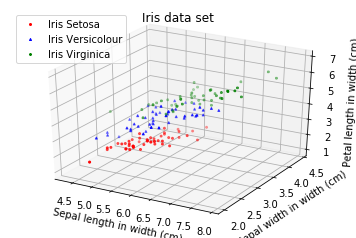

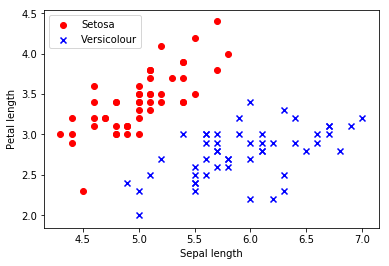

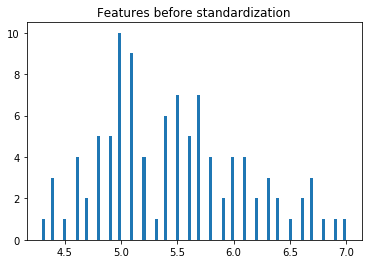

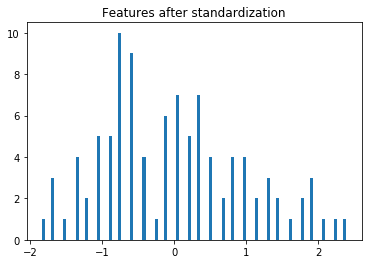

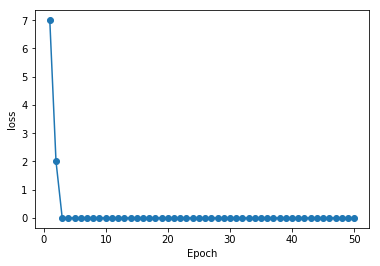

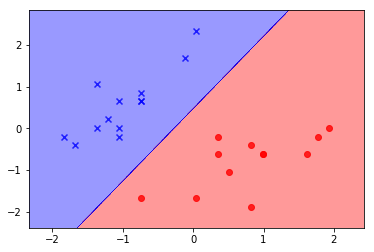

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class Prptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
    def ft(self, x: np.array, y: np.array, n_iter=50):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        for _ in range(n_iter):
            loss = 0
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update * xi
                loss += int(update != 0.0)
            self.misclassified_samples.append(loss)
    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b
    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.head()
y = df.iloc[:, 4].values
x = df.iloc[:, 0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, edgecolor='green', label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()
x = x[0:100, 0:2]
y = y[0:100]
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')

plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',
            label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()
from sklearn.model_selection import train_test_split
y = np.where(y == 'Iris-setosa', 1, -1)
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                random_state=0)
classifier = Prptron(learning_rate=0.01)
classifier.ft(x_train, y_train)
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y):
    resolution = 0.001
    markers = ('o', 'x')
    cmap = ListedColormap(('red', 'blue'))
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=markers[idx],
                    label=c1)
    plt.show()
plot_decision_regions(x_test, y_test)

In [ ]:
#Training for 100 epochs

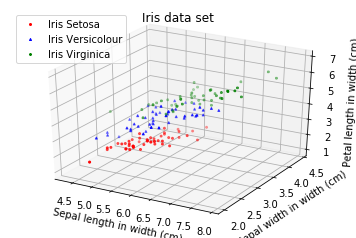

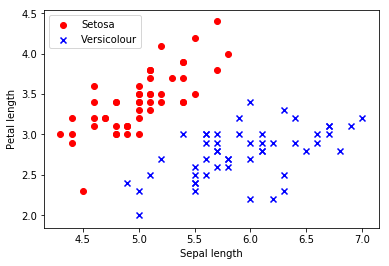

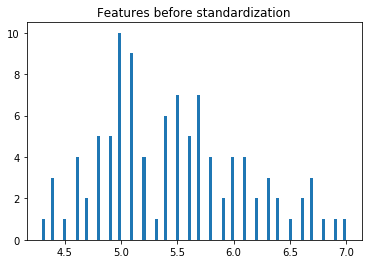

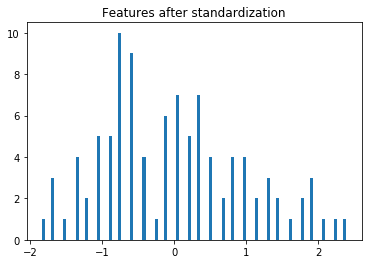

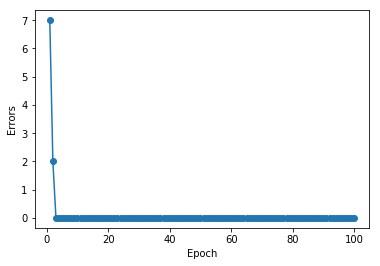

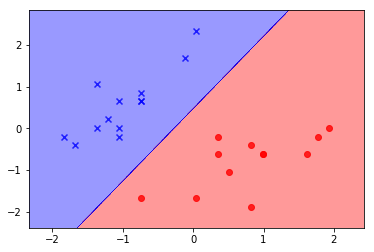

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class Prptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
    def ft(self, x: np.array, y: np.array, n_iter=100):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        for _ in range(n_iter):
            loss = 0
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update * xi
                loss += int(update != 0.0)
            self.misclassified_samples.append(loss)
    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b
    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.head()
y = df.iloc[:, 4].values
x = df.iloc[:, 0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, edgecolor='green', label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()
x = x[0:100, 0:2]
y = y[0:100]
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')

plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',
            label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()
from sklearn.model_selection import train_test_split
y = np.where(y == 'Iris-setosa', 1, -1)
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                random_state=0)
classifier = Prptron(learning_rate=0.01)
classifier.ft(x_train, y_train)
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y):
    resolution = 0.001
    markers = ('o', 'x')
    cmap = ListedColormap(('red', 'blue'))
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=markers[idx],
                    label=c1)
    plt.show()
plot_decision_regions(x_test, y_test)